# Obesity classifier using XG Boost

In [1]:
#import required packages
import pandas as pd

In [2]:
#import dataset
df=pd.read_csv("Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,3
104,107,16,0,160,10,3.9,3
105,108,21,1,180,15,5.6,3
106,109,26,0,150,15,5.6,3


In [9]:
#splitting dependent and independent variables
X = df.iloc[:, 0:7]
y = df.iloc[:, -1]

In [10]:
#splitting train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=42) 

In [11]:
#train test data shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 7)
(33, 7)
(75,)
(33,)


In [12]:
#scaler transform
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
!pip install xgboost

In [16]:
#creating model
import xgboost
from xgboost import XGBClassifier
(XGBClassifier)

xgboost.sklearn.XGBClassifier

In [17]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)
model=xgbt.fit(X_train, y_train)
model

[06:26:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimarors" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimarors=10, n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [18]:
#prediction
xgbt_pred = xgbt.predict(X_test)

In [20]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, xgbt_pred))
print(xgbt.score(X_train, y_train))
print(xgbt.score(X_test, y_test))

1.0
1.0
1.0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

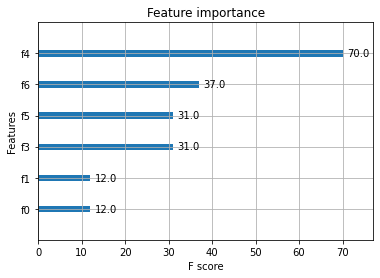

In [21]:
#plotting
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(xgbt)